# Проект: Исследование стартапов

## Введение

Финансовая компания, работающая с венчурными инвестициями, хочет понять закономерности финансирования стартапов и оценить перспективы выхода на рынок с покупкой и развитием компаний. Для этого необходимо провести исследование на исторических данных. Вы поработаете с информацией о компаниях, объёмах и типах привлечённых инвестиций, а также с дополнительной статистикой по возвратам средств.

Цель проекта
Ваша задача — подготовить датасет к работе, исследовать данные о стартапах, раундах финансирования, людях и сделках, чтобы получить представление о типичном размере инвестиций, связях между размером компании и полнотой данных, особенностях объединения данных и показателях, важных для принятия инвестиционных решений.

В рамках проекта были поставлены следующие задачи:
- Провести предобработку данных, убрать дубликаты и пропуски, проверить корректность числовых и временных значений.
- Выделить группы компаний по срокам финансирования и сравнить их по количеству и объёму инвестиций.
- Классифицировать сегменты рынка на массовые, средние и нишевые и учесть это в дальнейшем анализе.
- Определить типичные и аномальные значения объёмов финансирования, исключить выбросы и ограничить период исследования.
- Сравнить популярность и объёмы разных типов финансирования.
- Проанализировать динамику раундов и объёмов инвестиций по годам, а также изменения в массовых сегментах рынка.
- Рассчитать долю возврата средств для разных типов финансирования и оценить её устойчивость.
- Подвести итоговые выводы и дать рекомендации, куда и каким образом было бы целесообразно инвестировать.

Описание данных
- Таблица acquisition

Содержит информацию о покупках одними компаниями других компаний:
   
    - id — идентификатор покупки.
    - acquiring_company_id — идентификатор покупающей компании.
    - acquired_company_id — идентификатор покупаемой компании.
    - term_code — варианты расчёта.
    - price_amount — сумма сделки.
    - acquired_at — дата сделки.
- Таблица company_and_rounds

Содержит информацию о компаниях и раундах финансирования:
    
    - company ID — идентификатор компании.
    - name — название компании.
    - category code — категория области деятельности компании.
    - status — статус компании.
    - founded at — дата инвестирования.
    - closed at — дата закрытия компании.
    - domain — официальный сайт компании.
    - network username — ник компании в сети.
    - country code — код страны компании.
    - investment rounds — число инвестиционных раундов.
    - funding rounds — число раундов финансирования.
    - funding total — сумма финансирования.
    - milestones — вехи финансирования.
    - funding round id — идентификатор этапа финансирования.
    - company id — идентификатор компании.
    - funded at — дата финансирования.
    - funding round type — тип финансирования.
    - raised amount — сумма финансирования.
    - pre money valuation — предварительная денежная оценка.
    - participants — число участников.
    - is first round — является ли раунд первым.
    - is last round — является раунд последним.
- Таблица education

Содержит информацию об образовании сотрудника:

    - id — идентификатор записи об образовании.
    - person_id — идентификатор работника.
    - instituition — название учебного заведения.
    - graduated_at — дата получения образования.
- Таблица people

Содержит информацию о сотрудниках:
    
    - id — идентификатор сотрудника.
    - first_name — имя сотрудника.
    - last_name — фамилия сотрудника.
    - company_id — идентификатор компании.
    - network_username — ник в социальных сетях.
- Таблица degrees

Содержит информацию о типе образования сотрудника:

    - id — идентификатор записи.
    - object_id — идентификатор сотрудника.
    - degree_type — тип образования.
    - subject — специальность.

Дополнительные таблицы

Эти таблицы не требуются для выполнения проекта, но связаны с исследуемыми данными:

- Таблица fund

Содержит информацию о фондах:

    - id — идентификатор фонда.
    - name — название фонда.
    - category_code — категория области деятельности компании.
    - founded_at — дата создания фонда.
    - domain — сайт фонда.
    - network_username — ник фонда в сети.
    - country_code — код страны фонда.
    - investment_rounds — число инвестиционных раундов.
    - invested_companies — число профинансированных компаний.
    - milestones — вехи финансирования.
- Таблица investment

Содержит информацию о раундах инвестирования:

    - id — идентификатор этапа инвестирования.
    - funding_round_id — идентификатор раунда инвестирования.
    - company_id — индентификатор компании.
    - funding_round_type — тип финансирования.
    - fund_id — идентификатор фонда.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik
from phik import phik_matrix

In [2]:
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

In [3]:
print(f'Датасет company_and_rounds:')
display(company_and_rounds.head(), company_and_rounds.info())
print(f'Датасет acquisitions:')
display(acquisition.head(), acquisition.info())
print(f'Датасет people:')
display(people.head(), people.info())
print(f'Датасет education:')
display(education.head(), education.info())
print(f'Датасет degrees:')
display(degrees.head(), degrees.info())
print(f'Датасет fund:')
display(fund.head(), fund.info())
print(f'Датасет investment:')
display(investment.head(), investment.info())

Датасет company_and_rounds:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company 

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None

Датасет acquisitions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


None

Датасет people:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


None

Датасет education:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


None

Датасет degrees:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


None

Датасет fund:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


None

Датасет investment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


None

In [4]:
company_and_rounds = company_and_rounds.rename(columns={'company  id': 'fund_company_id'})
# выводим столбцы датафрейма company_and_rounds и провидим их названия к snake case
company_and_rounds.columns = company_and_rounds.columns.str.lower().str.replace('  ', '_')
display(company_and_rounds.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'fund_company_id', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

Загрузили и вывели информацию по всем датафреймам. Исходя из выведенной информации видно, что некоторые типы столбцов необходимо привести к другому формату (далее в следующем пункте). Также, в датафрейме 'company_and_rounds' привели наименование столбцов к snake_case. 

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [5]:
# Меняем типы данных в некторых столбцах датафреймов с типом object в целочисленный тип и оптимизируем разрядность
columns_to_int = ['company_id', 'investment_rounds', 'funding_rounds', 'milestones', 'funding_round_id', 
'participants',  'is_first_round', 'is_last_round']
for col in columns_to_int:
    company_and_rounds[col] = company_and_rounds[col].astype('Int64')
people['company_id'] = people['company_id'].astype('Int64')

# Меняем тип данных в столбцах датафреймов с датой и временем
for col in ['founded_at','closed_at','funded_at']:
    company_and_rounds[col] = pd.to_datetime(company_and_rounds[col], errors='coerce')
company_and_rounds.info()

acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], errors='coerce')
acquisition.info()

education['graduated_at'] = pd.to_datetime(education['graduated_at'], errors='coerce')
education.info()

fund['founded_at'] = pd.to_datetime(fund['founded_at'], errors='coerce')
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  Int64         
 13  funding_round_

In [6]:
# Проверим долю пропусков во всех таблицах
def missing_report(df, name):
    missing = df.isna().mean()*100
    print(f'\n{name}:')
    display(missing)

missing_report(company_and_rounds, 'company_and_rounds')
missing_report(acquisition, 'acquisition')
missing_report(people, 'people')
missing_report(education, 'education')
missing_report(degrees, 'degrees')
missing_report(fund, 'fund')
missing_report(investment, 'investment')


company_and_rounds:


company_id              0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
fund_company_id        75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64


acquisition:


id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64


people:


id                   0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64


education:


id               0.000000
person_id        0.000000
instituition     0.050178
graduated_at    47.035854
dtype: float64


degrees:


id              0.000000
object_id       0.000000
degree_type    10.234468
subject        25.829760
dtype: float64


fund:


id                     0.000000
name                   0.017164
founded_at            60.478888
domain                36.817714
network_username      81.556814
country_code          39.469619
investment_rounds      0.000000
invested_companies     0.000000
milestones             0.000000
dtype: float64


investment:


id                  0.0
funding_round_id    0.0
company_id          0.0
fund_id             0.0
dtype: float64

Проанализируем пропуски по каждой таблице, оценим, насколько они критичны, и что с ними делать — удалять, заполнять или оставить как есть.

🔹 company_and_rounds
- founded_at (49.5%) - Очень много пропусков.	Дата основания — ключевая инфа для анализа стадий компании. Удалять все строки невыгодно. Лучше оставить, возможно, использовать позже как маркер неопределённого возраста.
- closed_at (98.4%) - Почти всё это пропуски.	Ожидаемо, так как большинство компаний ещё работают. Этот столбец можно оставить как есть, и считать NaN как "не закрыта".
- category_code (33.9%) - Много пропусковю Важная категория. Можно рассмотреть замену на 'unknown' или оставить NaN и отдельно анализировать с/без них. Удалять строки не стоит.
- country_code (50.1%) - Очень много пропусков. Страну важно знать, но при таком объёме лучше не удалять. Альтернатива: анализ по известным и неизвестным странам.
- funding_round_id, company_id, funded_at, 75.809784, funding_round_type, raised_amount, pre_money_valuation, participants,   is_first_round, is_last_round - (75.6%)	Очень много пропусков. Эти столбцы относятся к данным по раундам, и видимо заполняются не для всех компаний. Возможно, есть дублирование и нужно разделить таблицу. Удалять не стоит, лучше работать с подтаблицами.

📌 Вывод:
Удалять строки не стоит. Лучше анализировать по подгруппам, где нужные поля есть.

🔹 acquisition
- term_code (80.5%) - Очень много пропусков. Не ключевой столбец. Можно проигнорировать или оставить как категорию 'unknown'.
- acquired_at (0.3%) - Мало пропусков. Можно удалить пару строк или заполнить при наличии альтернативной даты.

📌 Вывод:
Удалять ничего не нужно. Просто оставить term_code с NaN, не мешает.

🔹 people
- first_name (0.2%) - Мало пропусков. 
- last_name (0.04%) - Очень мало пропусков
- company_id (84.7%) - Очень много пропусков . Это важно — с какой компанией связан человек. Возможно, это внешние эксперты или нет связки. Можно оставить, но анализировать осторожно.
- network_username (82.8%) - Не критичною Неважное поле, можно игнорировать.

📌 Вывод:
Оставить как есть, company_id — использовать только если он есть.

🔹 education
- instituition (5%) - Мало пропусков.	Можно удалить эти строки.
- graduated_at (47%)- Много пропусков. Дата окончания — полезно, но не критично. Лучше оставить NaN.

📌 Вывод:
Можно удалить строки без instituition, остальные оставить.

🔹 degrees
- degree_type (10%) - Умеренно. Можно либо заменить на 'unknown', либо оставить NaN.
- subject (25.8%)	- Много пропусков. Но полезно. Лучше не удалять, но понимать, что часть данных по предмету образования неполная.

📌 Вывод:
Удалять — не нужно.

🔹 fund
- founded_at (60.5%) - Много пропусков.  Желательно знать возраст фонда.
- domain (36.8%)	- Много пропусков. Малоценный столбец. Оставить.
- network_username (81.6%) - Неважно	Игнорировать.
- country_code (39.5%) - Умеренно. Важно, но с таким уровнем лучше не удалять строки.

📌 Вывод:
Удалять — не стоит. Использовать осторожно. Возможно, анализ по подвыборкам с данными.

🔹 investment
Нет пропусков — всё отлично ✅



In [7]:
display("Полные дубликаты:")
display("company_and_rounds:", company_and_rounds.duplicated().sum())
display("acquisition:", acquisition.duplicated().sum())
display("people:", people.duplicated().sum())
display("education:", education.duplicated().sum())
display("degrees:", degrees.duplicated().sum())
display("fund:", fund.duplicated().sum())
display("investment:", investment.duplicated().sum())

'Полные дубликаты:'

'company_and_rounds:'

0

'acquisition:'

0

'people:'

0

'education:'

0

'degrees:'

0

'fund:'

0

'investment:'

0

Не обнаружено полных дубликатов во всех присутсвующих датафреймах.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [8]:
company_and_rounds['funded_year'] = company_and_rounds['funded_at'].dt.year.astype('Int64')
pivot_table_company_and_rounds = company_and_rounds.pivot_table(
    index= 'funded_year',
    values=['raised_amount','funding_round_id'],
    aggfunc={'raised_amount' : 'median' , 'funding_round_id':'count'}
)


filtered_pivot_table_company_and_rounds = pivot_table_company_and_rounds[pivot_table_company_and_rounds['funding_round_id'] > 50]


display(filtered_pivot_table_company_and_rounds)

,funding_round_id,raised_amount
funded_year,,
1999,76,2000000.0
2000,125,4200000.0
2001,96,3000000.0
2002,116,4200000.0
2003,159,3000000.0
2004,291,5000000.0
2005,1633,5500000.0
2006,2436,5000000.0
2007,3279,3973320.0


Построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

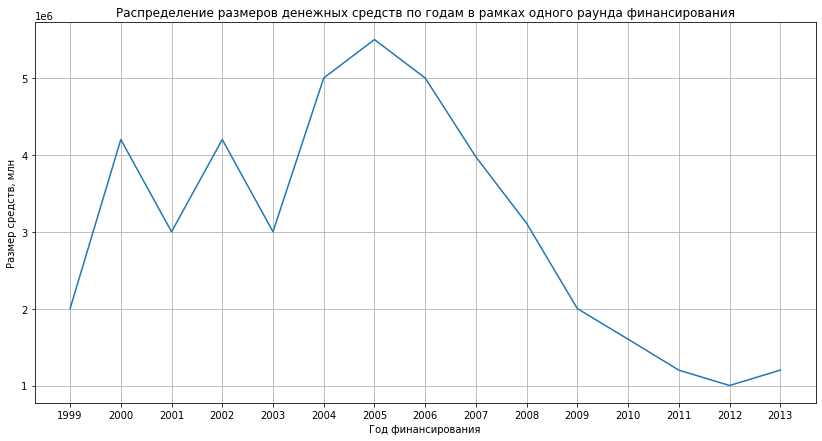

In [9]:
filtered_pivot_table_company_and_rounds.plot(kind = 'line',
y = 'raised_amount',
use_index=True,
title = 'Распределение размеров денежных средств по годам в рамках одного раунда финансирования',
xlabel = 'Год финансирования',
ylabel = 'Размер средств, млн',
figsize = (14,7),
legend = False)

plt.xticks(range(1999, 2014, 1))
plt.grid()

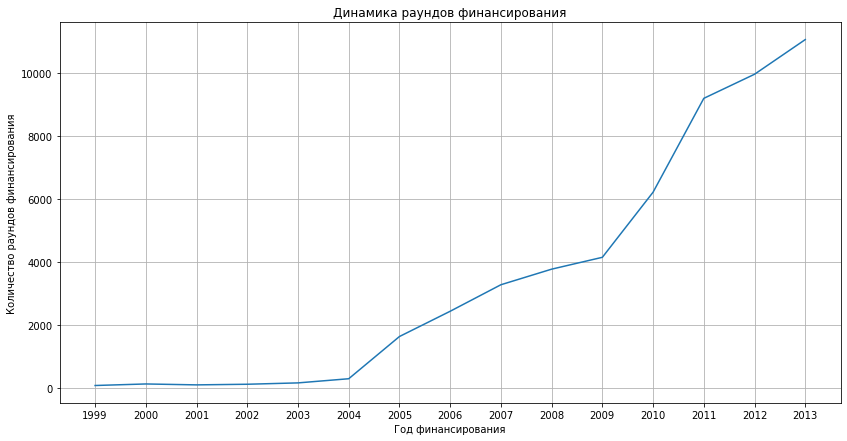

In [10]:
filtered_pivot_table_company_and_rounds.plot(kind = 'line',
y = 'funding_round_id',
use_index=True,
title = 'Динамика раундов финансирования',
xlabel = 'Год финансирования',
ylabel = 'Количество раундов финансирования',
figsize = (14,7),
legend = False)

plt.xticks(range(1999, 2014, 1))
plt.grid()

В качестве типичного размера средств, выделяемых в рамках одного раунда был опреден показатель в виде медианы. Максимальный типичный размер собранных в рамках одного раунда средств был в 2005 году, и составил 5,5 млн. После 2005 года по 2013 динамика по типичному размеру привлеченных денежных средств была отрицательной. Количество раундов финансирования после 2005 года стремительно увеличивалось, при этом размер финансирования снижался. 

К 2013 году наблюдается максимальное количество раундов финансирования за весь анлизируемый период, а именно 11072 раунда. Это говорит о тенденции к развитию возможностей для стартапов и увеличении активности на рынке инвестиций, однако эти инвестиции стали меннее крупными в денежном выражении.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [11]:
# Объединение датасетов people и education
education_people= people.merge(education, left_on='id', right_on='person_id', how='left', suffixes=('_people', '_education'))
education_people.info()
education_people.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   Int64         
 4   network_username  50775 non-null   object        
 5   id_education      109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 20.7+ MB


,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaN,NaT
5,100002,Keith,Kurzendoerfer,<NA>,NaN,NaN,NaN,NaN,NaT
6,100006,Courtney,Homer,81558,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01
7,100009,Eddy,Badrina,<NA>,NaN,NaN,NaN,NaN,NaT
8,100010,Michael,Dadashyan,<NA>,fbroulette,NaN,NaN,NaN,NaT
9,100011,Jeff,Grell,<NA>,NaN,NaN,NaN,NaN,NaT


In [12]:
# Присоединим к объединенному датафрейму на прошлом шаге, датафрейм degrees
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [13]:
degrees['object_id']=degrees['object_id'].str.replace('p:','') # убираем 'p:' перед идентификатором сотрудника
degrees['object_id']=pd.to_numeric(degrees['object_id'], downcast='float', errors='coerce') # меянем тип в столбце 'object_id' для присоединения
degrees.head()

,id,object_id,degree_type,subject
0,1,6117.0,MBA,NaN
1,2,6136.0,BA,"English, French"
2,3,6136.0,MS,Mass Communication
3,4,6005.0,MS,Internet Technology
4,5,5832.0,BCS,"Computer Science, Psychology"


In [14]:
education_people_degrees = education_people.merge(degrees, left_on='person_id', right_on='object_id', how='left')
education_people_degrees = education_people_degrees.rename(columns={'id':'id_degree'})
education_people_degrees = education_people_degrees.drop(columns=['id_education','person_id','object_id']) # удаляем избыточные ID-столбцы
education_people_degrees.info()
education_people_degrees.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370836 entries, 0 to 370835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         370836 non-null  int64         
 1   first_name        370831 non-null  object        
 2   last_name         370835 non-null  object        
 3   company_id        70869 non-null   Int64         
 4   network_username  81529 non-null   object        
 5   instituition      212109 non-null  object        
 6   graduated_at      113991 non-null  datetime64[ns]
 7   id_degree         212198 non-null  float64       
 8   degree_type       190722 non-null  object        
 9   subject           156477 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 31.5+ MB


,id_people,first_name,last_name,company_id,network_username,instituition,graduated_at,id_degree,degree_type,subject
0,10,Mark,Zuckerberg,5,NaN,Harvard University,NaT,2415.0,NaN,Computer Science
1,100,Peter,Lester,27,NaN,NaN,NaT,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaT,NaN,NaN,NaN
3,10000,Neil,Capel,2526,NaN,NaN,NaT,NaN,NaN,NaN
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaT,NaN,NaN,NaN


In [15]:
duplicates = education_people_degrees.duplicated(subset=['id_people', 'first_name', 'last_name', 'company_id', 'network_username']).sum()
print(f"Количество дубликатов:{duplicates}")

Количество дубликатов:144127


Далее удалим эти дубликаты

In [16]:
education_people_degrees_cleaned = education_people_degrees.drop_duplicates(subset=['id_people', 'first_name', 'last_name', 'company_id', 'network_username'])
education_people_degrees_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226709 entries, 0 to 370835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         226709 non-null  int64         
 1   first_name        226704 non-null  object        
 2   last_name         226708 non-null  object        
 3   company_id        34615 non-null   Int64         
 4   network_username  38867 non-null   object        
 5   instituition      68031 non-null   object        
 6   graduated_at      36387 non-null   datetime64[ns]
 7   id_degree         68071 non-null   float64       
 8   degree_type       61401 non-null   object        
 9   subject           50808 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 19.2+ MB


In [17]:
# В датафрейм добавим доп столбец with_education с признаком наличия законченного образования по столбцам даты 
# окончания graduated_at и типу образования degree_type 
education_people_degrees_cleaned['with_education'] = (
   education_people_degrees_cleaned['graduated_at'].notna() | 
    education_people_degrees_cleaned['degree_type'].notna()
)

education_people_degrees_cleaned.head()

/tmp/ipykernel_401/2160131472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_people_degrees_cleaned['with_education'] = (


,id_people,first_name,last_name,company_id,network_username,instituition,graduated_at,id_degree,degree_type,subject,with_education
0,10,Mark,Zuckerberg,5,NaN,Harvard University,NaT,2415.0,NaN,Computer Science,False
1,100,Peter,Lester,27,NaN,NaN,NaT,NaN,NaN,NaN,False
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaT,NaN,NaN,NaN,False
3,10000,Neil,Capel,2526,NaN,NaN,NaT,NaN,NaN,NaN,False
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaT,NaN,NaN,NaN,False


Разделим все компании на несколько групп по количеству сотрудников, оценим количество сотрудников всего и сотрудников с  образованием в каждой из групп.

In [18]:
education_stats = (
    education_people_degrees_cleaned
    .groupby('company_id')
    .agg(
        total_employees=('id_people', 'count'),  # Общее число сотрудников
        educated_employees=('with_education', 'sum')  # Число сотрудников с образованием
    )
    .sort_values('total_employees', ascending=False)  # Сортировка по количеству сотрудников
    .reset_index()  # Преобразуем company_id обратно в столбец
)
display(education_stats)

,company_id,total_employees,educated_employees
0,59,244,163
1,29,150,107
2,1242,138,98
3,231067,72,51
4,499,63,41
...,...,...,...
22917,63585,1,0
22918,7258,1,1
22919,63581,1,0
22920,63580,1,1


Подводка по категориям к следующим ниже расчетам: 

Возьмем распределение категорий по численности сотрудников. Компании постараемся разделить по численности сотрудников на следующие категории так, чтобы в каждой корзине было сопоставимое количество примеров:
- Соло - 1 человек
- Партнеры - 2 человека
- Микро - 3-5 человек	
- Малые - 6-10 человек	
- Средние - 11-20 человек	
- Крупные - 21-50 человек
- Корпорации - 50+ человек

Компании с численность сотрудников равным 1 это скорее стартапы , такая картина вполне выглядит реальной, так как это могут быть самозанятые и например ИП на страте своего бизнеса (по типу Стива Джобса в гараже). Назвоем данную категорию "Соло" как Соло-основатели"</div>

Создадим функцию для классификации компаний по числу сотрудников, которая:

- Добавит в датафрейм новый столбец с категорией размера компании

- Рассчитает процент работников с подтвержденным образованием для каждой размерной группы"

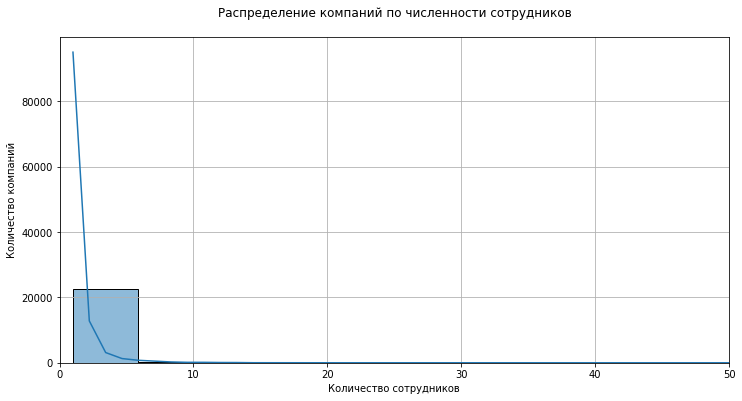

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(education_stats['total_employees'], bins=50, kde=True)
plt.title('Распределение компаний по численности сотрудников', pad=20)
plt.xlabel('Количество сотрудников')
plt.ylabel('Количество компаний')
plt.xlim(0, 50)  # Фокусируемся на диапазоне, где сосредоточено большинство данных
plt.grid()
plt.show()

Построил график распредления для анализа численности сотрудников, где больше всего сосредоточено данных, а это порядка 98% команий с численностью до 5-ти сотрудников включительно</div>

1 (Соло)            18117
2 (Партнеры)         2709
3-5 (Микро)          1608
6-10 (Малые)          368
11-20 (Средние)        92
21-50 (Крупные)        19
50+ (Корпорации)        9
Name: size_category, dtype: int64

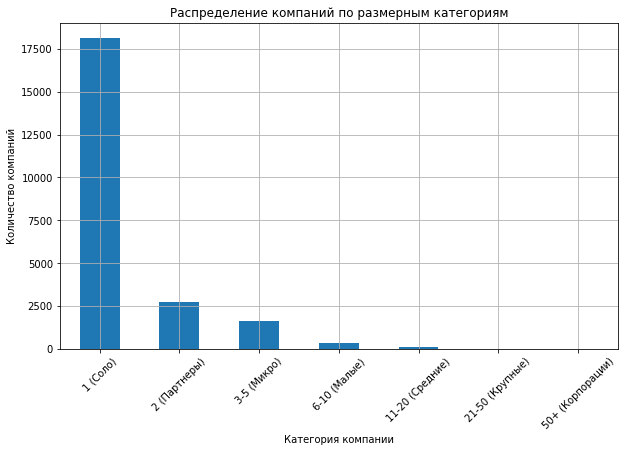

Анализ полноты данных об образовании по новым категориям:


,num_companies,total_employees,educated_employees,education_rate
size_category,,,,
1 (Соло),18117,18117,9339,51.5
2 (Партнеры),2709,5418,2749,50.7
3-5 (Микро),1608,5748,2738,47.6
6-10 (Малые),368,2664,1189,44.6
11-20 (Средние),92,1220,628,51.5
21-50 (Крупные),19,557,361,64.8
50+ (Корпорации),9,891,600,67.3


In [20]:
bins = [0, 1, 2, 5, 10, 20, 50, float('inf')]
labels = [
    '1 (Соло)',
    '2 (Партнеры)',
    '3-5 (Микро)',
    '6-10 (Малые)',
    '11-20 (Средние)',
    '21-50 (Крупные)',
    '50+ (Корпорации)'
    ]
education_stats['size_category'] = pd.cut(
    education_stats['total_employees'],
    bins=bins,
    labels=labels,
)

# Проверяем распределение по категориям
category_distribution = education_stats['size_category'].value_counts().sort_index()
display(category_distribution)
# Визуализация распределения
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar')
plt.title('Распределение компаний по размерным категориям')
plt.xlabel('Категория компании')
plt.ylabel('Количество компаний')
plt.xticks(rotation=45)
plt.grid()
plt.show()
# Анализ полноты данных по новым категориям
education_completeness = (
    education_stats.groupby('size_category')
    .agg(
        num_companies=('company_id', 'count'),
        total_employees=('total_employees', 'sum'),
        educated_employees=('educated_employees', 'sum')
    )
    .assign(
        education_rate=lambda x: round(x['educated_employees'] / x['total_employees'] * 100, 1)
    )
)

# Выводим результаты
print("Анализ полноты данных об образовании по новым категориям:")
display(education_completeness)

Для повышения точности анализа был расширен исходный датасет degrees путем объединения данных из трех взаимосвязанных таблиц. Этот подход позволил сформировать более комплексный критерий "образованности сотрудника", учитывающий как формальные признаки (наличие диплома), так и содержательные характеристики (тип и профиль образования).

Методология классификации компаний:


- Соло - 1 человек
- Партнеры - 2 человека
- Микро - 3-5 человек	
- Малые - 6-10 человек	
- Средние - 11-20 человек	
- Крупные - 21-50 человек
- Корпорации - 50+ человек

Ключевые закономерности:

Корреляция размера компании и уровня образования:

- Максимальный показатель (67.3%) зафиксирован среди корпораций.

- Минимальные значения (44.6%) наблюдаются у малых пердприятий.

- Разрыв в 22.7 процентных пунктов подтверждает гипотезу о более строгих кадровых требованиях в крупных организациях.

Структура распределения:

- На малые формы бизнеса (Соло-основатели + партнеры + микропредприятия) приходится свыше 98% сотрудников

Выводы по категориям компаний (простыми словами):

1. Один самозанятый (Соло) - 51,5% с образованием

Неожиданно много образованных - каждый второй

Вероятно, это фрилансеры (программисты, дизайнеры), которым важно показывать диплом

2. Два партнера - 50,7%

Почти как у одиночек, но чуть меньше

Обычно это маленькие семейные бизнесы или стартапы друзей

3. Команда 3-5 человек - 47,6%

Самый низкий показатель

Нанимают "своих" без проверки документов

Часто это кафе, маленькие магазины

4. 6-10 сотрудников - 44,6%

Еще меньше образованных

Видимо, берут работников "с руками", а не с дипломами

5. 11-20 человек - 51,5%

Резкий рост - каждый второй с образованием

Появился кадровик, который проверяет документы

Бизнес стал серьезнее, клиенты требовательнее

6. 21-50 сотрудников - 64,8%

Две трети коллектива с образованием

Официальный найм с отделами кадров

Требуют диплом при приеме на работу

7. Крупнее 50 человек - 67,3%

Максимальный уровень

Строгий отбор кандидатов

Но данных мало - всего 9 таких компаний в выборке

Главные закономерности:

- В самых маленьких компаниях (1 человек) неожиданно много образованных - видимо, это узкие специалисты

- Чем больше компания (после 10 человек), тем строже относятся к образованию сотрудников

- В микро-бизнесе (3-10 человек) чаще смотрят на навыки, а не на корочки

Что это значит на практике:

- В стартапах и кафе можно без диплома

- В средних и крупных компаниях без образования сложнее

- Данные по одиночкам и корпорациям могут быть неполными</div>

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [21]:
company_usernames = set(company_and_rounds['network_username'].dropna()) #удаляем пропуски
people_usernames = set(people['network_username'].dropna())
match = company_usernames & people_usernames

print(f"Общее количество уникальных значений в company_and_rounds: {len(company_usernames)}")
print(f"Общее количество уникальных значений в people: {len(people_usernames)}")
print(f"Количество совпадающих значений между company_and_rounds и people: {len(match)}")
print(f"Доля совпадающих значений (match и company_and_rounds): {len(match) / len(company_usernames)*100:.2f}%")
print(f"Доля совпадающих значений (match и people): {len(match) / len(people_usernames) * 100:.2f}%")

Общее количество уникальных значений в company_and_rounds: 79571
Общее количество уникальных значений в people: 38421
Количество совпадающих значений между company_and_rounds и people: 2199
Доля совпадающих значений (match и company_and_rounds): 2.76%
Доля совпадающих значений (match и people): 5.72%


Результаты анализа демонстрируют крайне низкую пригодность столбца network_username для объединения данных. Вот ключевые аргументы против его использования. Использование network_username для объединения данных не рекомендуется из-за:
- Недостаточной покрывающей способности (<6% совпадений)
- Отсутствия надежности связей
- Высокого потенциала для ошибок сопоставления


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Анализ структуры исходного набора данных company_and_rounds показал, что он фактически объединяет два различных типа информации, которые целесообразно разделить для последующей работы. Разделим его ниже на 2 датафрейма.

In [22]:
company = company_and_rounds[[
'company_id',
'name',
'category_code',
'status',
'founded_at',
'closed_at',
'domain',
'network_username',
'country_code',
'investment_rounds',
'funding_rounds',
'funding_total',
'milestones'
]].drop_duplicates(subset=['company_id'])

company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  Int64         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  Int64         
 10  funding_rounds     196553 non-null  Int64         
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  Int64         
dtypes: Int64(4), datetime64[ns](2), float64(1), 

In [23]:
rounds = company_and_rounds[[
'funding_round_id',
'fund_company_id',
'funded_at',
'funding_round_type',
'raised_amount',
'pre_money_valuation',
'participants',
'is_first_round',
'is_last_round'
]]

rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  Int64         
 1   fund_company_id      52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  Int64         
 7   is_first_round       52928 non-null  Int64         
 8   is_last_round        52928 non-null  Int64         
dtypes: Int64(4), datetime64[ns](1), float64(3), object(1)
memory usage: 15.8+ MB


Мы разделили таблицу company_and_rounds на две company и rounds, а также удалили дубликаты для дальнейшей корректной работы с данными.


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [24]:
# Фильтрация компаний по заданным критериям
target_companies = company[
    (company['funding_rounds'] > 0) | 
    (company['investment_rounds'] > 0) |
    (company['status'] == 'acquired')
].copy()
target_companies.info()
target_companies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  Int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  Int64         
 10  funding_rounds     40747 non-null  Int64         
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  Int64         
dtypes: Int64(4), datetime64[ns](2), float64(1), object(6)
memory

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.0,0
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0.0,4
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000.0,3
20,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0.0,4


Отфильтровали датафрейм company (был отделен от company_and_rounds) и получили новый - target_companies. В результате получили 13 столбцов, 40747 строк. 


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [25]:
target_companies['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

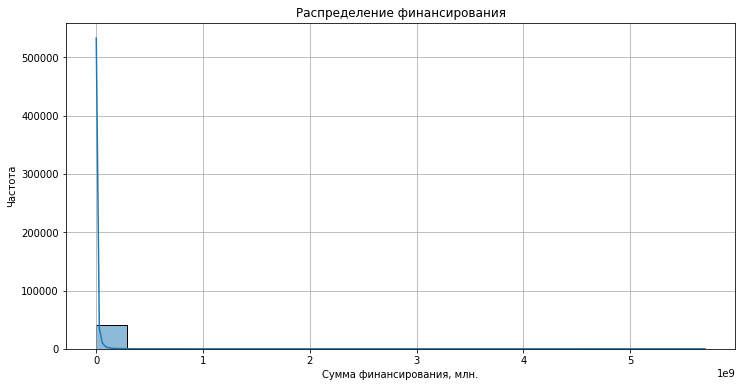

In [26]:
plt.figure(figsize = (12, 6))
sns.histplot(data = target_companies,
x = 'funding_total',
bins = 20,
kde = True)
plt.title('Распределение финансирования')
plt.xlabel('Сумма финансирования, млн.')
plt.ylabel('Частота')
plt.grid()
plt.show()

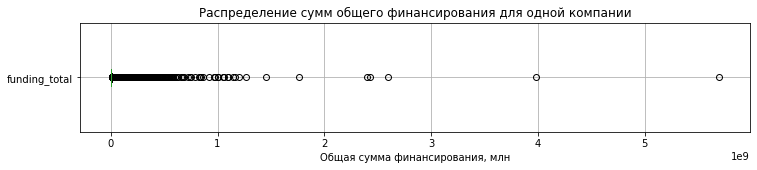

In [27]:
plt.figure(figsize = (12, 2))
target_companies.boxplot(column = 'funding_total', vert = False)
plt.title('Распределение сумм общего финансирования для одной компании')
plt.xlabel('Общая сумма финансирования, млн')
plt.show()

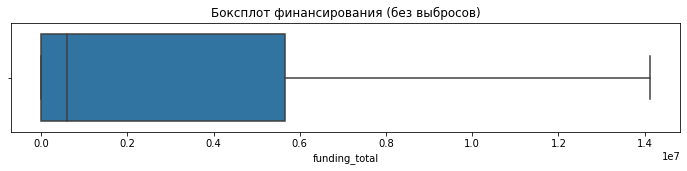

In [28]:
plt.figure(figsize=(12, 2))
sns.boxplot(data=target_companies, x='funding_total', showfliers=False)  # Игнорируем выбросы
plt.title('Боксплот финансирования (без выбросов)')
plt.show()

Особенности распределения финансирования:

1. Сильный перекос данных

Средний размер инвестиций (10.14 млн) в 17 раз превышает медианный (0.6 млн). Такой огромный разрыв свидетельствует, что:

    - Большинство компаний получают относительно небольшие инвестиции

    - Несколько сверхкрупных сделок (выбросов) искусственно завышают среднее значение

2. Нулевое финансирование
Как минимум 25% компаний в выборке вообще не привлекли инвестиций (значение 0). Это может означать:

- Ранние стартапы на этапе бутстрэппинга

- Компании, не прошедшие даже первый раунд финансирования

- Возможные пропуски в данных

3. Экстремальные выбросы
Максимальное значение (5.7 млрд) колоссально отличается от 75% компаний, получивших менее 5.65 млн:

- Разница между максимумом и 75-м процентилем составляет три порядка величины (в 1000 раз)

- Такие аномалии характерны для единичных "единорогов" или ошибок в данных

Ключевая проблема анализа

Обычные статистические методы (например, использование среднего значения) будут давать искаженную картину из-за:

- Массового скопления данных около нуля

- Длинного "хвоста" экстремально высоких значений

- Отсутствия симметрии в распределении

Рекомендации по интерпретации

Для объективной оценки следует:

- Использовать медиану (0.6 млн) как показатель типичного случая

- Выделить отдельные группы:

    - Компании без финансирования (25%)

    - Основная масса (50% между 0 и 5.65 млн)

    - Крупные сделки (>5.65 млн)

    - Экстремальные выбросы (>100 млн)

- Анализировать каждую группу отдельно


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [29]:
# Объединяем подготовленный датафрейм с информацей о компаниях с датафреймом с информацией о покупках одними компаниями 
# других компаний 
acquisitions_company = pd.merge(
target_companies,
acquisition[['acquired_company_id', 'price_amount','term_code']],
left_on = 'company_id',
right_on = 'acquired_company_id',
how = 'left'
)
acquisitions_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           40890 non-null  Int64         
 1   name                 40890 non-null  object        
 2   category_code        35436 non-null  object        
 3   status               40890 non-null  object        
 4   founded_at           27911 non-null  datetime64[ns]
 5   closed_at            2128 non-null   datetime64[ns]
 6   domain               35883 non-null  object        
 7   network_username     20938 non-null  object        
 8   country_code         34858 non-null  object        
 9   investment_rounds    40890 non-null  Int64         
 10  funding_rounds       40890 non-null  Int64         
 11  funding_total        40890 non-null  float64       
 12  milestones           40890 non-null  Int64         
 13  acquired_company_id  9390 non-n

Далее фильтруем данные по условию задачи и посмотрим на распределения по разным категориям

In [30]:
acquisitions_company_filtred = acquisitions_company[
(acquisitions_company['status'] == 'acquired') &
(acquisitions_company['funding_total'] > 0) &
((acquisitions_company['price_amount'] == 0) |
(acquisitions_company['price_amount'] == 1))
]
acquisitions_company_filtred.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquired_company_id,price_amount,term_code
25,10054,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0,7,121500000.0,3,10054.0,0.0,cash_and_stock
63,101312,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0,3,4000000.0,2,101312.0,0.0,NaN
66,101340,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0,1,250000.0,1,101340.0,0.0,NaN
67,10137,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0,3,1310000.0,2,10137.0,0.0,cash_and_stock
68,10139,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0,2,44925000.0,1,10139.0,0.0,NaN


In [31]:
def create_distribution_table(column_name):
    abs_counts = acquisitions_company_filtred[column_name].value_counts()
    rel_counts = acquisitions_company_filtred[column_name].value_counts(normalize=True) * 100
    return pd.DataFrame({
        'Абсолютное количество': abs_counts,
        'Доля (%)': rel_counts.round(1)
    })

# 1. Распределение по категориям компаний
category_dist = create_distribution_table('category_code')
print("\nРаспределение по категориям компаний:")
display(category_dist)

# 2. Распределение по странам
country_dist = create_distribution_table('country_code')
print("\nРаспределение по странам:")
display(country_dist)

# 3. Распределение по способу покупки
term_dist = create_distribution_table('term_code')
print("\nРаспределение по способу покупки:")
display(term_dist)

# 4. Количество проданных компаний и их медианное значение финансирования
print("\nКоличество проданных компаний и их медианное значение финансирования:")
acquisitions_company_filtred.groupby('price_amount').agg({'company_id' : 'count', 'funding_total' : 'median'})


Распределение по категориям компаний:


,Абсолютное количество,Доля (%)
software,362,23.3
web,216,13.9
enterprise,131,8.4
mobile,118,7.6
advertising,77,5.0
games_video,76,4.9
biotech,69,4.4
ecommerce,61,3.9
network_hosting,56,3.6
semiconductor,43,2.8



Распределение по странам:


,Абсолютное количество,Доля (%)
USA,1236,80.5
GBR,64,4.2
CAN,46,3.0
DEU,31,2.0
ISR,27,1.8
FRA,24,1.6
IRL,11,0.7
DNK,9,0.6
SWE,8,0.5
IND,7,0.5



Распределение по способу покупки:


,Абсолютное количество,Доля (%)
cash,68,56.2
cash_and_stock,35,28.9
stock,18,14.9



Количество проданных компаний и их медианное значение финансирования:


,company_id,funding_total
price_amount,,
0.0,1618,6000000.0


Выводы по анализу сделок за 0-1 доллар.

1. Распределение по категориям компаний
ТОП-5 категорий, чаще всего продаваемых за $0-1:

- Software (23.3%) – стартапы в области ПО, вероятно, приобретаются за технологии или команду

- Web (13.9%) – веб-сервисы, возможно, с устаревшими бизнес-моделями

- Enterprise (8.4%) – B2B-решения, где ценность в клиентской базе

- Mobile (7.6%) – мобильные приложения с низкой монетизацией

- Advertising (5.0%) – рекламные платформы, зависимые от партнеров

Наименее популярные категории:

- Авто, спорт, транспорт (<0.5%) – нишевые рынки с высокими входными барьерами.

Инсайт: Покупатели чаще всего приобретают за $0-1 технологические стартапы (software, web), вероятно, ради интеллектуальной собственности или talent-аквизиции.

2. Распределение по странам
Доминирование США: 80.5% сделок – американские компании.

Европейские лидеры:

- Великобритания (4.2%)

- Германия (2.0%)

- Франция (1.6%)

Азия почти не представлена (Китай, Япония, Корея – <1% в сумме).

Почему?

В США больше стартапов с венчурным финансированием.

В Европе и Азии сделки чаще происходят на рыночных условиях (не за $0-1).

3. Способ покупки
- Cash (56.2%) – формальные сделки с минимальной ценой.

- Cash + Stock (28.9%) – комбинация денег и акций, что типично для поглощений.

- Stock (14.9%) – обмен акциями (например, при слияниях).

Важно: В 56% случаев покупатель просто выплачивает $0-1 без дополнительных условий, что может указывать на:

Приобретение активов с долгами.

Юридические формальности (например, смена владельца без реальной оплаты).

4. Финансирование проданных компаний

Медианное финансирование: $6 млн – это немало для "бесплатных" сделок.

Интерпретация:

Компании могли привлечь инвестиции, но не выйти на прибыльность.

Покупатели могли брать на себя долги (отсюда цена $0).


In [32]:
# Рассчитаем показатели выбросов, для этого используем квартили
Q1 = acquisitions_company_filtred['funding_total'].quantile(0.25)
Q3 = acquisitions_company_filtred['funding_total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(Q1 - 1.5 * IQR, 0)
upper_bound = Q3 + 1.5 * IQR
emissions = acquisitions_company_filtred[(acquisitions_company_filtred['funding_total'] < lower_bound) | (acquisitions_company_filtred['funding_total'] > upper_bound)]
lower_percentile = (acquisitions_company_filtred['funding_total'] <= lower_bound).mean() * 100
upper_percentile = (acquisitions_company_filtred['funding_total'] <= upper_bound).mean() * 100
print(f"Данные описательной статистики:")
print(f"Нижний квартиль на отметке {Q1}.")
print(f"Верхний квартиль на отметке {Q3}.")
print(f"Размах финансирования компаний {IQR}.")
print(f"Нижний порог выбросов {lower_bound}.")
print(f"Верхний порог выбросов {upper_bound}.")
print(f'Типичный размер финансирования: от {Q1} до {Q3}')
print(f'Количество выбросов: {len(emissions)}')
print(f"Нижняя граница соответствует {lower_percentile:.2f}% данных.")
print(f"Верхняя граница соответствует {upper_percentile:.2f}% данных.")

Данные описательной статистики:
Нижний квартиль на отметке 2000000.0.
Верхний квартиль на отметке 15500000.0.
Размах финансирования компаний 13500000.0.
Нижний порог выбросов 0.
Верхний порог выбросов 35750000.0.
Типичный размер финансирования: от 2000000.0 до 15500000.0
Количество выбросов: 147
Нижняя граница соответствует 0.00% данных.
Верхняя граница соответствует 90.91% данных.


Границы данных:

- Верхний предел: $35.75 млн (превышают только 9% компаний)

- Нижний предел: $0 (отрицательных значений нет)

Распределение:

- 25% компаний: получили менее $2 млн

- 75% компаний: получили менее $15.5 млн

- 91% компаний: уложились в $0-35.75 млн

Выбросы:

- Всего 9% компаний выходят за верхнюю границу (>$35.75 млн)

- Нижних выбросов нет (все значения ≥$0)

Суть: Большинство компаний (91%) привлекли до 35.75 млн, при этом половина - менее 15.5 млн. Крупные инвестиции (>35.75 млн) - редкие случаи (9%).


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

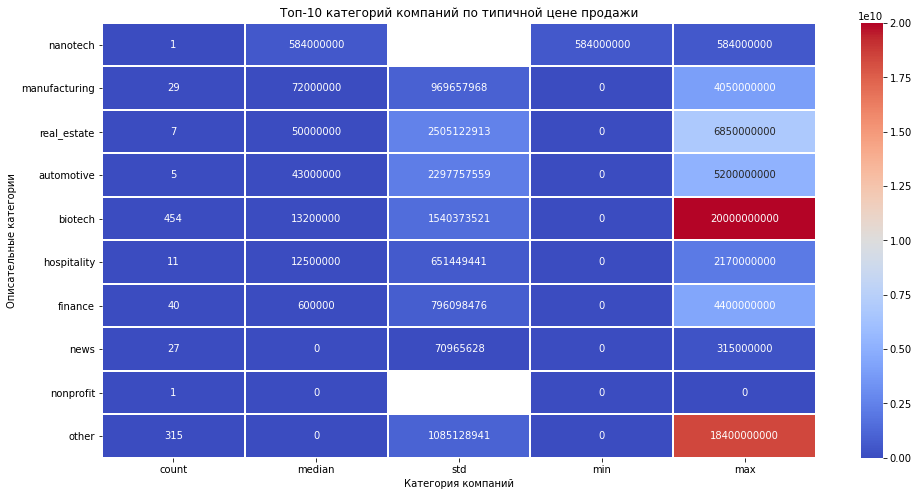

In [33]:
company_category_df = acquisitions_company.loc[acquisitions_company['category_code'].notna() & acquisitions_company['price_amount'].notna()]
group_company_category = company_category_df.groupby('category_code')['price_amount'].agg(['count','median','std','min','max'])
top_10_median = group_company_category.sort_values('median', ascending = False).head(10)
plt.figure(figsize = (16, 8))
sns.heatmap(data = top_10_median, annot = True, fmt = '.0f', linewidths = 1, cmap = 'coolwarm')
plt.title('Топ-10 категорий компаний по типичной цене продажи')
plt.xlabel('Категория компаний')
plt.ylabel('Описательные категории')
plt.show()

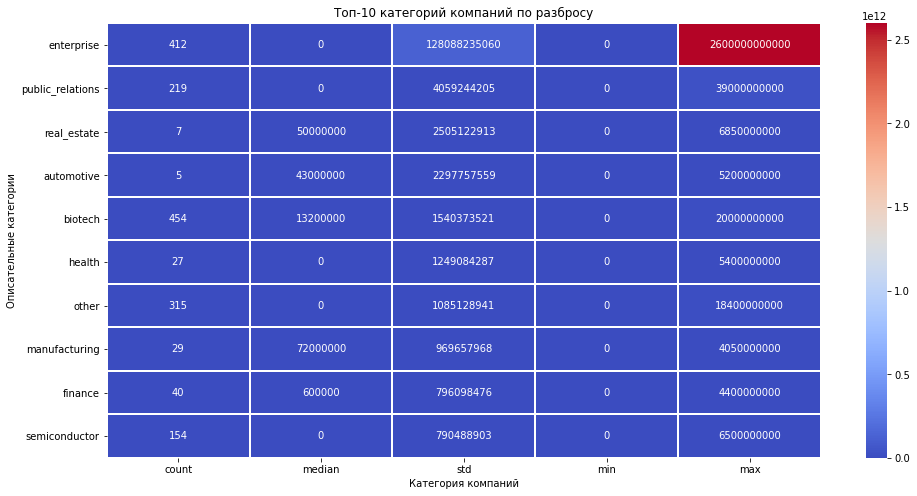

In [34]:
top_10_std = group_company_category.sort_values('std', ascending = False).head(10)
plt.figure(figsize = (16, 8))
sns.heatmap(data = top_10_std, annot = True, fmt = '.0f', linewidths = 1, cmap = 'coolwarm')
plt.title('Топ-10 категорий компаний по разбросу')
plt.xlabel('Категория компаний')
plt.ylabel('Описательные категории')
plt.show()

Мы проанализировали разброс цен на стартапы. В качестве типичной цены взяли медиану — она лучше отражает реальную картину, чем среднее значение, так как суммы сделок сильно варьируются.

Для оценки разброса использовали стандартное отклонение: чем оно выше, тем больше колебания в ценах. Также учли количество сделок, минимальную и максимальную стоимость.

Топ-10 категорий позволяет выявить самые перспективные и рисковые направления для инвестиций. Сравнив два рейтинга (по медианной цене и разбросу), мы выделили три наиболее интересные сферы:

- Недвижимость (real estate)

- Автомобильный бизнес (automotive)

- Биотехнологии (biotech)

Эти категории сочетают высокую доходность и значительные риски, что делает их привлекательными для крупных инвесторов.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [35]:
rounds = acquisitions_company[acquisitions_company['funding_rounds'] >0]
status_df = rounds.groupby('status').agg({'funding_rounds':'mean'}).reset_index()
print(f"Таблица типичного количества раундов по статусу:")
status_df

Таблица типичного количества раундов по статусу:


,status,funding_rounds
0,acquired,1.897766
1,closed,1.383437
2,ipo,2.526531
3,operating,1.642359


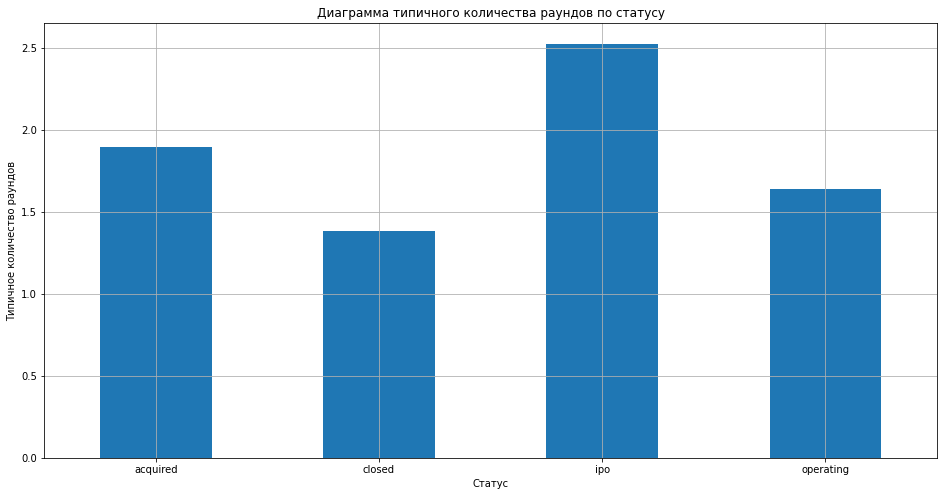

In [36]:
status_df.plot(kind = 'bar',
x = 'status',
y = 'funding_rounds',
rot = 0,
legend = False,
figsize = (16, 8))
plt.title('Диаграмма типичного количества раундов по статусу')
plt.xlabel('Статус')
plt.ylabel('Типичное количество раундов')
plt.grid()
plt.show()

Количество раундов финансирования зависит от статуса компании:

- IPO-компании привлекают больше всего инвестиций (в среднем 2.5 раунда)

- Приобретённые (acquired) стартапы — ~1.9 раунда

- Действующие (operating) — ~1.6 раунда

Успешные компании (IPO и acquired) проходят больше раундов, что подтверждает связь между объемом привлеченных инвестиций и устойчивостью бизнеса.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

Предобработка данных

- Проведена стандартизация названий столбцов (snake_case), приведение дат к datetime и ID к целочисленному формату.

- Пропуски сохранены и обрабатывались индивидуально.

- Датасет company_and_rounds был разделен для удобства анализа.

Ключевые выводы

1. Рынок инвестиций:

- Лидеры: IT-сфера (software, web, enterprise, mobile).

- География: США (80% сделок), затем Великобритания и Канада.

- Тренд: снижение среднего чека с 5,5 млн (2005) до 1,2 млн (2013).

2. Топ-категории:

- Высокодоходные/рисковые: недвижимость, автомобильный сектор, биотех.

- IPO-компании привлекают больше раундов (2.5 vs 2 у приобретенных).

3. Дополнительно:

- 56% сделок — наличные.

- Образованность сотрудников выше в средних/крупных компаниях (выше 50%).

Рекомендации инвесторам

- Отрасли: IT (ликвидность), биотех/недвижимость (высокий риск/доход).

- География: США (основной рынок), Великобритания/Канада (альтернативы).

- Финансы: оптимальный чек — 2–15.5 млн; >35.75 млн — высокий риск.

- Критерии успеха: 2+ раунда финансирования, средний размер команды с образованными сотрудниками.

- Формат сделок: наличные (56%) — наиболее надежный вариант.